In [1]:
#import libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#get data
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
#checking out data
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


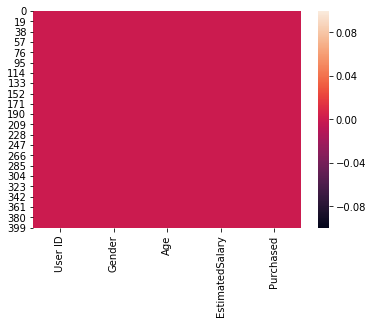

In [5]:
#checking for null values
sns.heatmap(dataset.isnull())

In [6]:
#droping userIID
dataset.drop(['User ID'], axis=1, inplace=True)

In [7]:
#getting dummies for gender
gender=pd.get_dummies(dataset['Gender'],drop_first=True)

In [8]:
#concating gender dataframe with dataset
dataset=pd.concat([dataset,gender],axis=1)

In [9]:
#drop Gender
dataset.drop(['Gender'],inplace=True,axis=1)

In [10]:
dataset.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


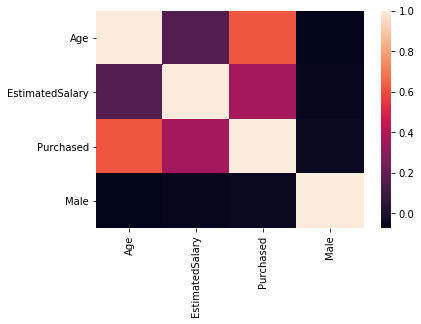

In [11]:
#correlation
sns.heatmap(dataset.corr())

In [12]:
#stardazing variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset.drop('Purchased',axis=1))
scaled_features = scaler.transform(dataset.drop('Purchased',axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """


In [13]:
df_feat = pd.DataFrame(scaled_features,columns=['Age', 'EstimatedSalary','Male'])
df_feat.head()

,Age,EstimatedSalary,Male
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204


In [14]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat,dataset['Purchased'],
                                                    test_size=0.30)

In [15]:
#import model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [16]:
#training
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
#predicting
y_pred = classifier.predict(X_test)

In [18]:
#evaluation
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cr=classification_report(y_test,y_pred)
print("Confusion Matrix: \n",cm)
print("Classification Report: \n", cr)

Confusion Matrix: 
 [[68 10]
 [ 8 34]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        78
           1       0.77      0.81      0.79        42

   micro avg       0.85      0.85      0.85       120
   macro avg       0.83      0.84      0.84       120
weighted avg       0.85      0.85      0.85       120



In [19]:
print("Accuracy is micro avg in classification report")

Accuracy is micro avg in classification report
